In [1]:
import torch, torchaudio

from models import LSTMClassifier, GRUClassifier, CNN_RNN
from datasets import SoundTracksDataset
from train import MultiClassTrainer
from data_visualisation import plot_spectrogram

In [2]:
torch.manual_seed(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dset = SoundTracksDataset(train=True).to(device)
train_dset, val_dset = dset.train_test_split(0.2)
val_dset, test_dset = val_dset.train_test_split(0.5)

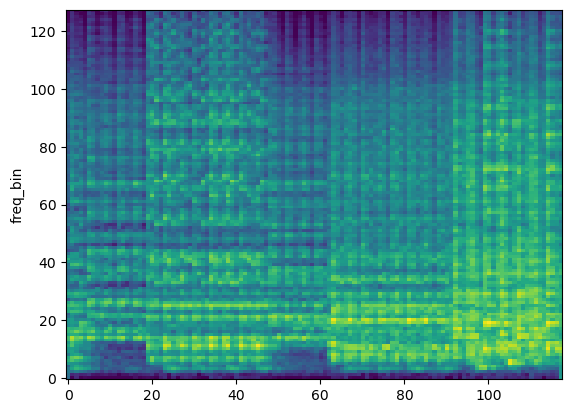

In [3]:
plot_spectrogram(train_dset.melspecs[0].cpu())

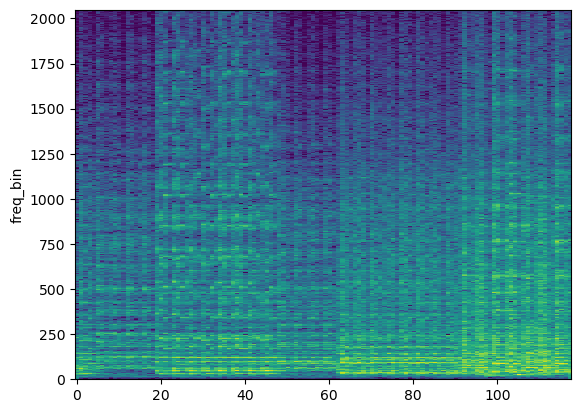

In [4]:
plot_spectrogram(train_dset.spectrograms[0].cpu(), to_db=True)

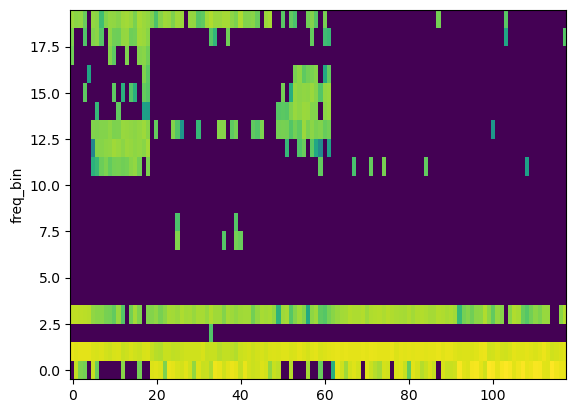

In [5]:
plot_spectrogram(train_dset.mfcc[0].cpu(), to_db=True)

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=27.4996    Train Acc=0.2765    Val Loss=27.5041    Val Acc=0.2857
Epoch 1    Train Loss=24.1140    Train Acc=0.2706    Val Loss=24.1171    Val Acc=0.2857
Epoch 2    Train Loss=20.9423    Train Acc=0.2706    Val Loss=20.9462    Val Acc=0.2857
Epoch 3    Train Loss=18.0143    Train Acc=0.2706    Val Loss=18.0183    Val Acc=0.2857
Epoch 4    Train Loss=15.3709    Train Acc=0.2706    Val Loss=15.3754    Val Acc=0.2857
Epoch 5    Train Loss=13.0413    Train Acc=0.2706    Val Loss=13.0464    Val Acc=0.2857
Epoch 6    Train Loss=11.0176    Train Acc=0.2706    Val Loss=11.0213    Val Acc=0.2857
Epoch 7    Train Loss=9.3049    Train Acc=0.2706    Val Loss=9.3078    Val Acc=0.2857
Epoch 8    Train Loss=7.8957    Train Acc=0.2706    Val Loss=7.8982    Val Acc=0.2857
Epoch 9    Train Loss=6.7881    Train Acc=0.2706    Val Loss=6.7904    Val Acc=0.2857
Epoch 10    Train Loss=5.9963    Train Acc=0.2706    Val Loss=5.9980    Val Acc=0.2857
Epo

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

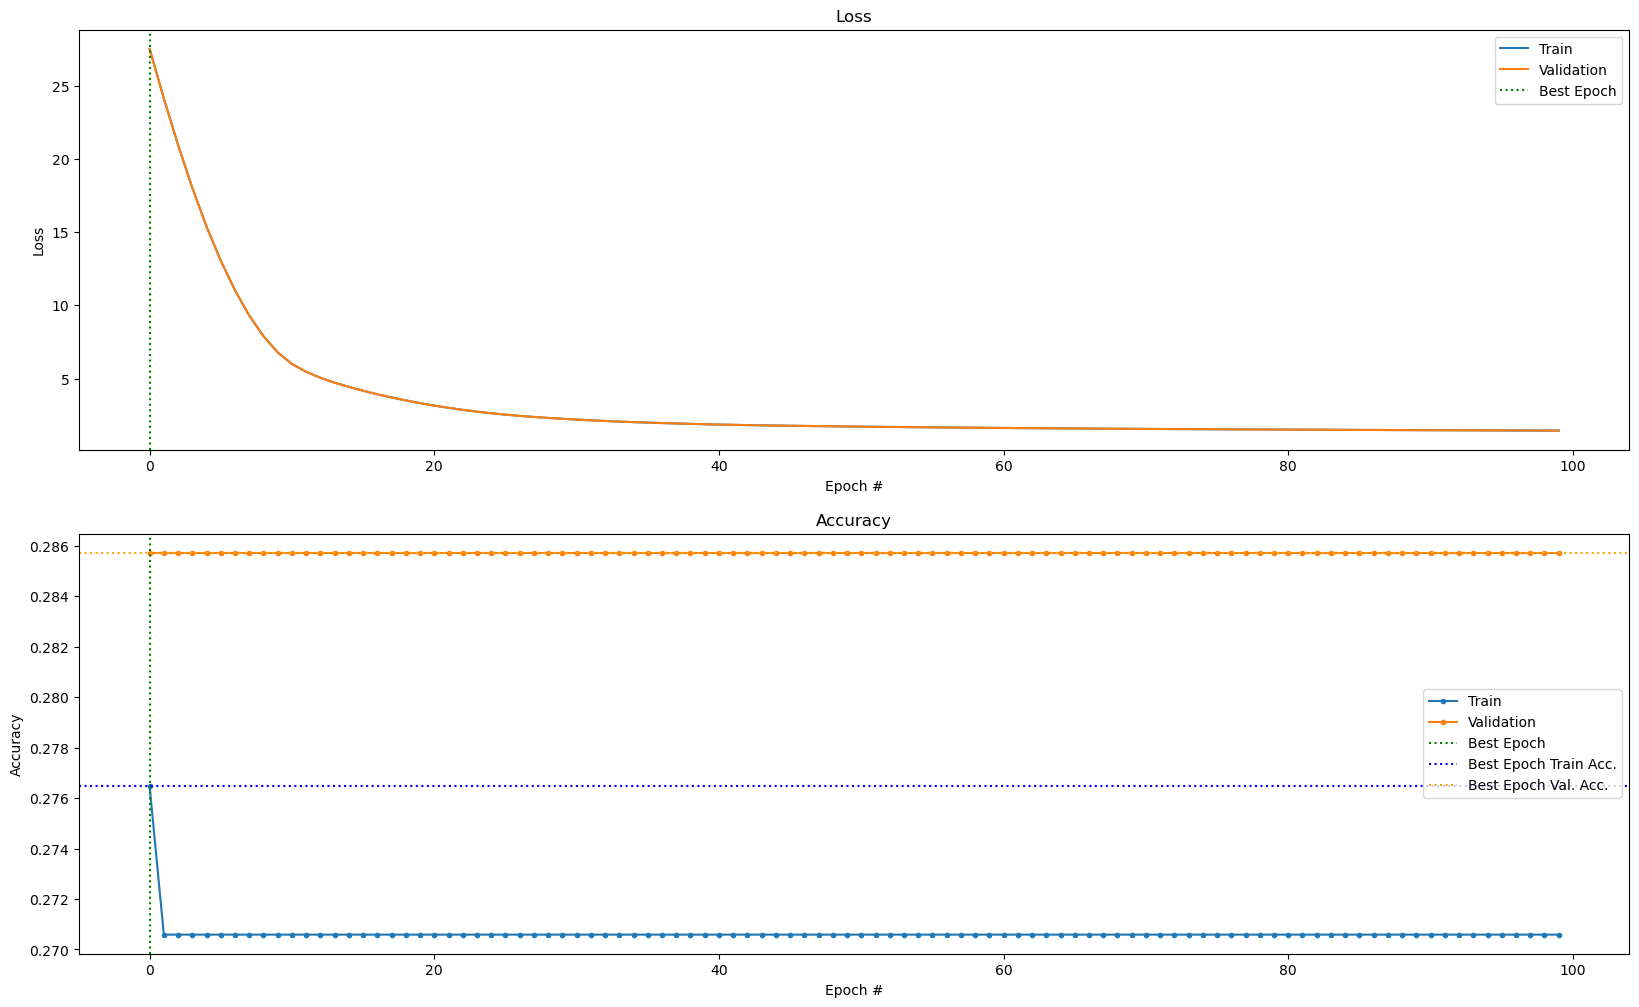

In [ ]:
model13 = CNN_RNN(
    feature='melspecs',
    out_features=4,
    gru_args={
        'input_size': 16, 
        'hidden_size': 64, 
        'num_layers': 1,
        'bidirectional': True
    }
).to(device)

print(model13(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 0.2
l1_ratio = 0.05
lr = 0.0005

trainer.train(model13, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

test_loss, test_acc, test_cm = trainer.evaluate_performance(model13, test_dset)
print(f'Test Loss={test_loss:.4f}    Test Acc={test_acc:.4f}')
ConfusionMatrixDisplay(test_cm.cpu().numpy()).plot()
plt.show()